<a href="https://colab.research.google.com/github/Mehebub-Hasan/CVPR/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [6]:
from google.colab import files
uploaded = files.upload()


Saving animal_dataset.zip to animal_dataset.zip


In [7]:
import zipfile
import os

zip_path = "animal_dataset.zip"

with zipfile.ZipFile(zip_path, 'r') as z:
    z.extractall("animal_dataset")

print("Dataset extracted successfully!")
print(os.listdir("animal_dataset"))


Dataset extracted successfully!
['animal_dataset']


In [8]:
import os

print("Current Working Directory:", os.getcwd())
print("Files and Folders:", os.listdir())


Current Working Directory: /content
Files and Folders: ['.config', 'animal_dataset.zip', 'animal_dataset', 'drive', 'sample_data']


In [9]:
print("Inside animal_dataset:", os.listdir("animal_dataset"))


Inside animal_dataset: ['animal_dataset']


In [10]:
dataset_path = "/content/animal_dataset/animal_dataset"


In [11]:
import os
import cv2
import numpy as np

dataset_path = "/content/animal_dataset/animal_dataset"

X = []
y = []

for class_name in os.listdir(dataset_path):
    class_path = os.path.join(dataset_path, class_name)

    if not os.path.isdir(class_path):
        continue

    for fname in os.listdir(class_path):
        fpath = os.path.join(class_path, fname)

        img = cv2.imread(fpath, cv2.IMREAD_GRAYSCALE)
        if img is None:
            print("Unreadable image:", fpath)
            continue

        img = cv2.resize(img, (32, 32))
        X.append(img.flatten())
        y.append(class_name)

X = np.array(X)
y = np.array(y)

print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (300, 1024)
y shape: (300,)


In [15]:
from google.colab import files
uploaded = files.upload()

Saving animal_dataset.zip to animal_dataset (1).zip


In [16]:
import zipfile
import os

zip_path = "animal_dataset.zip"

with zipfile.ZipFile(zip_path, 'r') as z:
    z.extractall("animal_dataset")

print("Dataset extracted successfully!")
print(os.listdir("animal_dataset"))

Dataset extracted successfully!
['animal_dataset']


In [17]:
dataset_path = "/content/animal_dataset/animal_dataset"

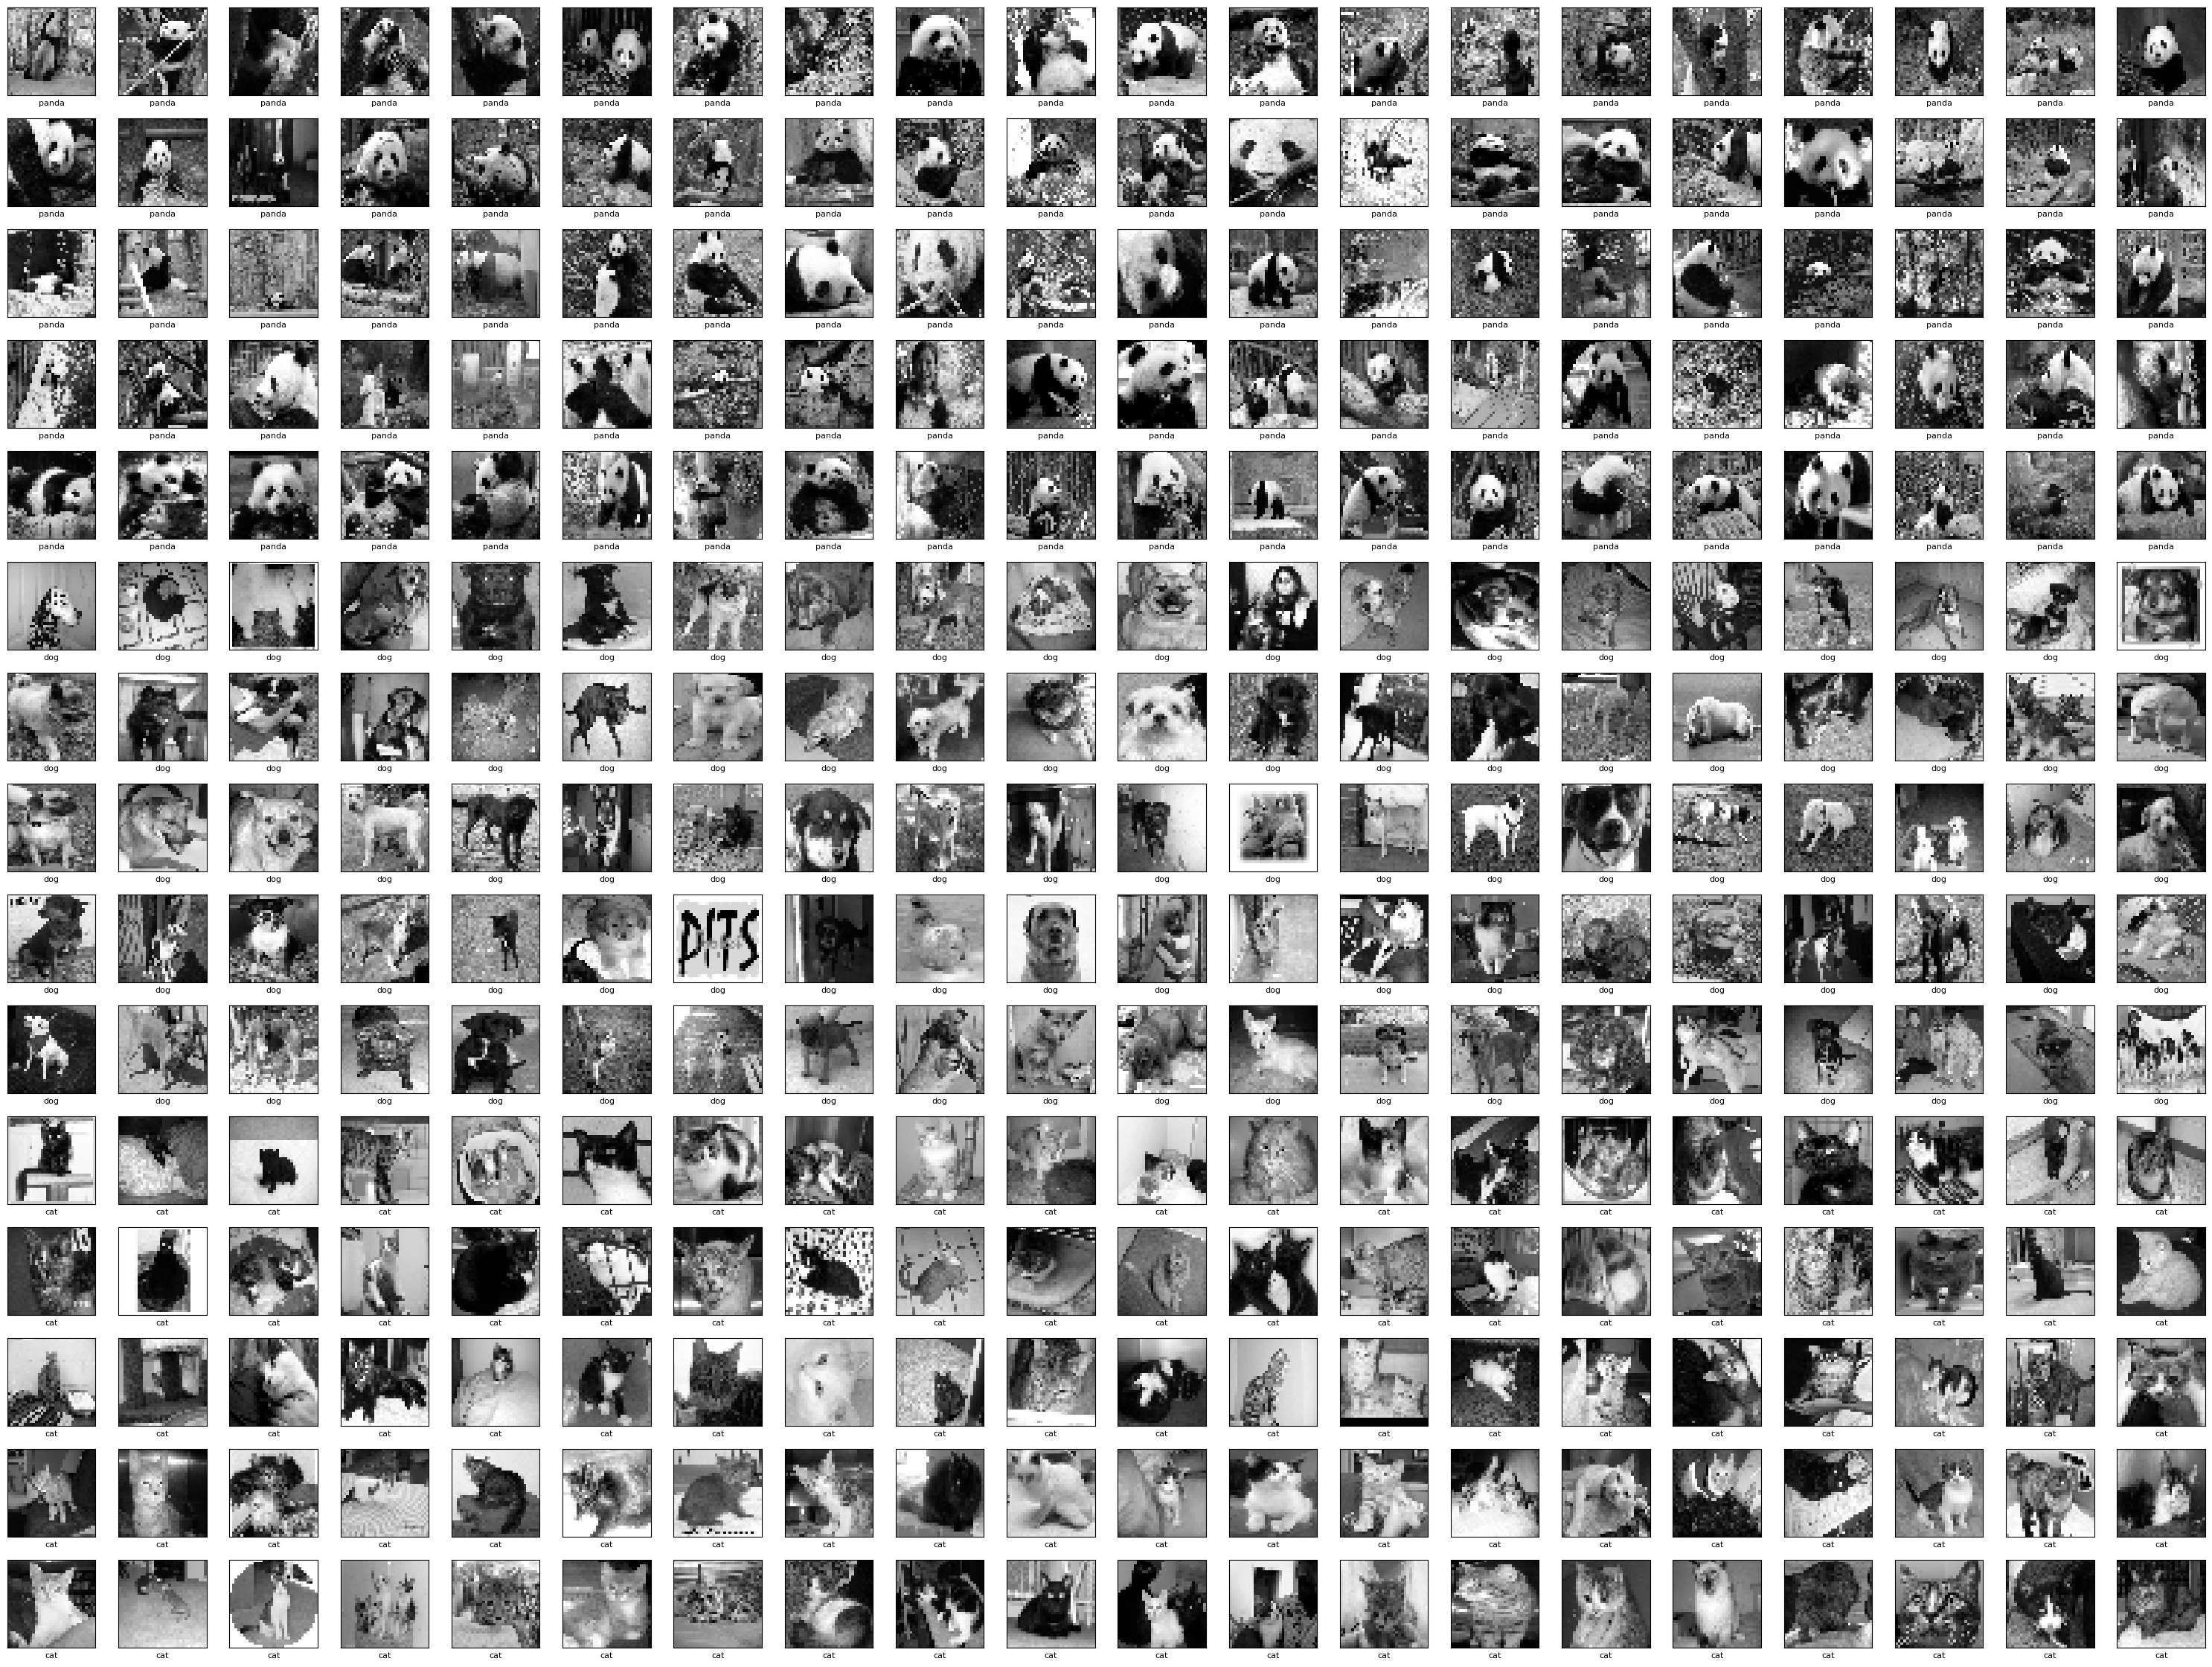

In [25]:
import matplotlib.pyplot as plt

# Calculate the number of rows and columns needed for all images
num_images = len(X)
num_cols = 20 # Let's aim for 20 columns for a reasonable layout
num_rows = (num_images + num_cols - 1) // num_cols # Ceiling division

plt.figure(figsize=(num_cols * 1.5, num_rows * 1.5)) # Adjust figure size dynamically

for i in range(num_images):  # Show all images
    plt.subplot(num_rows, num_cols, i+1)

    # Reshape back to 32x32
    img = X[i].reshape(32, 32)

    plt.imshow(img, cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(y[i], fontsize=8)

plt.tight_layout()
plt.show()

In [26]:
import os
import cv2
import numpy as np

X = []
y = []

for class_name in os.listdir(dataset_path):
    class_path = os.path.join(dataset_path, class_name)

    if not os.path.isdir(class_path):
        continue

    for fname in os.listdir(class_path):
        fpath = os.path.join(class_path, fname)

        img = cv2.imread(fpath, cv2.IMREAD_GRAYSCALE)
        if img is None:
            print("Unreadable image:", fpath)
            continue

        img = cv2.resize(img, (32, 32))
        X.append(img.flatten())
        y.append(class_name)

X = np.array(X)
y = np.array(y)

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (300, 1024)
y shape: (300,)


In [27]:
import os
import cv2
import numpy as np

dataset_path = "/content/animal_dataset/animal_dataset"

X = []
y = []

for class_name in os.listdir(dataset_path):
    class_path = os.path.join(dataset_path, class_name)

    if not os.path.isdir(class_path):
        continue

    for fname in os.listdir(class_path):
        fpath = os.path.join(class_path, fname)

        img = cv2.imread(fpath, cv2.IMREAD_GRAYSCALE)
        if img is None:
            print("Unreadable image:", fpath)
            continue

        img = cv2.resize(img, (32, 32))
        X.append(img.flatten())
        y.append(class_name)

X = np.array(X)
y = np.array(y)

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (300, 1024)
y shape: (300,)


In [28]:
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np

K_values = [1, 3, 5, 7, 9, 11, 13, 15]
metrics = ["euclidean", "manhattan"]

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

avg_accuracies = {m: [] for m in metrics}

for metric in metrics:
    print("\n===== Distance Metric:", metric, "=====")
    for K in K_values:
        fold_acc = []

        for train_idx, val_idx in kf.split(X, y):
            X_train, X_val = X[train_idx], X[val_idx]
            y_train, y_val = y[train_idx], y[val_idx]

            model = KNeighborsClassifier(n_neighbors=K, metric=metric)
            model.fit(X_train, y_train)

            preds = model.predict(X_val)
            acc = accuracy_score(y_val, preds)
            fold_acc.append(acc)

        mean_acc = np.mean(fold_acc)
        avg_accuracies[metric].append(mean_acc)

        print(f"K={K}, Accuracy={mean_acc:.4f}")



===== Distance Metric: euclidean =====
K=1, Accuracy=0.3100
K=3, Accuracy=0.3567
K=5, Accuracy=0.3367
K=7, Accuracy=0.3667
K=9, Accuracy=0.3600
K=11, Accuracy=0.3567
K=13, Accuracy=0.3400
K=15, Accuracy=0.3633

===== Distance Metric: manhattan =====
K=1, Accuracy=0.3633
K=3, Accuracy=0.3467
K=5, Accuracy=0.3700
K=7, Accuracy=0.3767
K=9, Accuracy=0.4100
K=11, Accuracy=0.4000
K=13, Accuracy=0.4033
K=15, Accuracy=0.4067


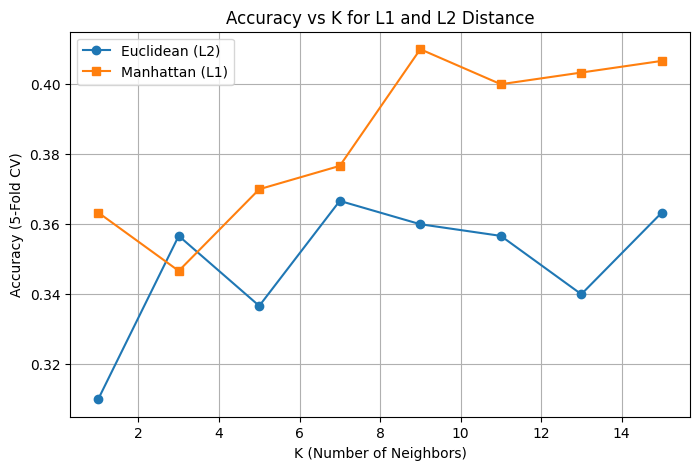

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))

plt.plot(K_values, avg_accuracies["euclidean"], marker='o', label="Euclidean (L2)")
plt.plot(K_values, avg_accuracies["manhattan"], marker='s', label="Manhattan (L1)")

plt.title("Accuracy vs K for L1 and L2 Distance")
plt.xlabel("K (Number of Neighbors)")
plt.ylabel("Accuracy (5-Fold CV)")
plt.grid(True)
plt.legend()

plt.show()


In [30]:
best_metric = "manhattan"
best_K = 5

final_knn = KNeighborsClassifier(n_neighbors=best_K, metric=best_metric)
final_knn.fit(X, y)

print("Final model trained successfully!")


Final model trained successfully!


In [31]:
import random

random_indices = random.sample(range(len(X)), 5)

for idx in random_indices:
    sample = X[idx].reshape(1, -1)
    pred = final_knn.predict(sample)[0]
    print(f"Image {idx} → Predicted class: {pred}")


Image 138 → Predicted class: dog
Image 55 → Predicted class: dog
Image 110 → Predicted class: dog
Image 253 → Predicted class: dog
Image 33 → Predicted class: cat


In [32]:
unique_classes, class_counts = np.unique(y, return_counts=True)

print("Dataset Class Distribution:")
for i in range(len(unique_classes)):
    print(f"- {unique_classes[i]}: {class_counts[i]} samples")

Dataset Class Distribution:
- cat: 100 samples
- dog: 100 samples
- panda: 100 samples
